# ICD Project

## Importing libraries

In [54]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from gensim.utils import simple_preprocess
from sklearn.feature_extraction.text import CountVectorizer
import contractions
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import pos_tag
import gensim
import gensim.corpora as corpora
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim.corpora import Dictionary
import nltk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Load Dataset

In [90]:
data = pd.read_csv('./data/icd_scopus.csv')
data["Country"]

0            Denmark
1             Turkey
2             Turkey
3          Australia
4           Malaysia
           ...      
379         Portugal
380              NaN
381    United States
382          Germany
383           Poland
Name: Country, Length: 384, dtype: object

## Basic exploratory content analysis

### Understanding the dataset

In [56]:
# Checking the shape of the dataset
data.shape

(384, 47)

In [57]:
# View the first 5 rows of the dataset
data.head(5)

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID,Country
0,NaN,NaN,NaN,International Conference on Applied Research i...,2023,Springer Proceedings in Business and Economics,NaN,NaN,NaN,NaN,...,NaN,NaN,English,Springer Proc. Bus. Econ.,Conference review,Final,NaN,Scopus,2-s2.0-85161683590,Denmark
1,Vargas A.C.; Magnussen R.,"Vargas, Alejandra Celis (57951796800); Magnuss...",57951796800; 55579157200,A Game-based Approach for Open Data in Educati...,2022,Proceedings of the European Conference on Game...,2022-October,NaN,NaN,139,...,NaN,NaN,English,Proc. European Conf. Games-based Learn.,Conference paper,Final,NaN,Scopus,2-s2.0-85141152410,Turkey
2,Fiş Erümit S.; Karakuş Yılmaz T.,"Fiş Erümit, S. (36343307300); Karakuş Yılmaz, ...",36343307300; 24166942000,Gamification Design in Education: What Might G...,2022,"Technology, Knowledge and Learning",27,4,NaN,1039,...,ICMLF,NaN,English,Tech. Knowl. Learn.,Article,Final,NaN,Scopus,2-s2.0-85128920438,Turkey
3,Alsamawi F.N.; Kurnaz S.,"Alsamawi, Farazdaq Nahedh (57224682003); Kurna...",57224682003; 57203640255,A framework for adopting gamified learning sys...,2023,Applied Nanoscience (Switzerland),13,2,NaN,1135,...,NaN,NaN,English,Appl. Nanosci. (Switzerland),Article,Final,All Open Access; Bronze Open Access; Green Ope...,Scopus,2-s2.0-85108164717,Australia
4,Karnalim O.; Simon; Chivers W.,"Karnalim, Oscar (57191242240); Simon (74097108...",57191242240; 7409710825; 6505969230,Non-game Incentives in Gamified Programming Ed...,2023,Lecture Notes in Networks and Systems,633 LNNS,NaN,NaN,910,...,NaN,NaN,English,Lect. Notes Networks Syst.,Conference paper,Final,NaN,Scopus,2-s2.0-85151127571,Malaysia


## Data Cleaning

### Checking for duplicate rows

In [88]:
data.duplicated().sum()

0

### Cheking for null values


In [59]:
# Checking for missing values
data.isna().sum()

Authors                           18
Author full names                 18
Author(s) ID                      18
Title                              0
Year                               0
Source title                       0
Volume                           102
Issue                            225
Art. No.                         297
Page start                       110
Page end                         114
Page count                       100
Cited by                           0
DOI                               73
Link                               0
Affiliations                      20
Authors with affiliations         20
Abstract                           0
Author Keywords                   42
Index Keywords                   150
Molecular Sequence Numbers       384
Chemicals/CAS                    380
Tradenames                       382
Manufacturers                    383
Funding Details                  278
Funding Texts                    280
References                        24
C

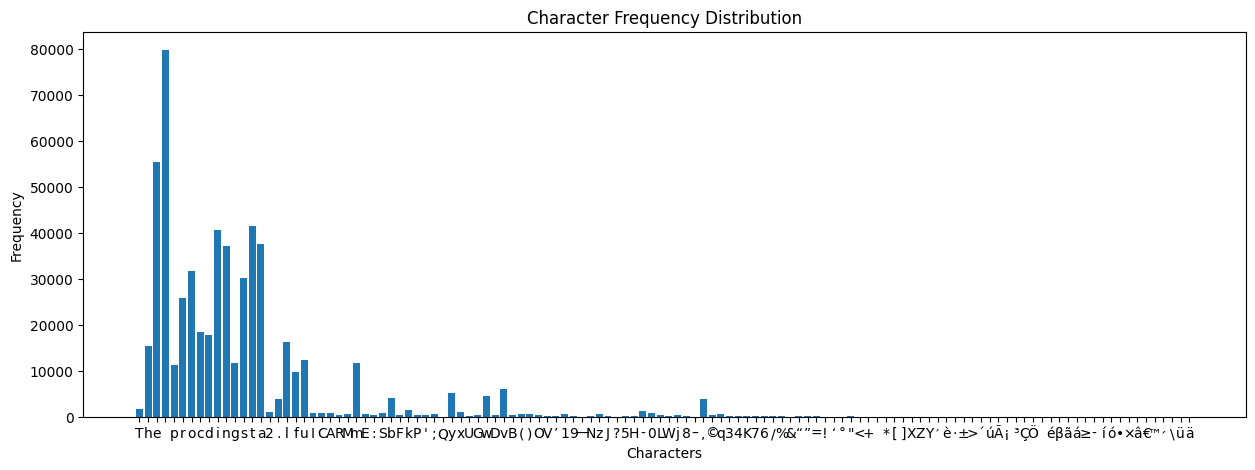

In [60]:
# Check special carateres and punctuation frequency
from collections import Counter


char_freq = Counter(data['Abstract'].str.cat())

# Prepare data for plotting
char_labels, char_values = zip(*char_freq.items())

# Create the plot
plt.figure(figsize=(15, 5))
plt.bar(char_labels, char_values)
plt.xlabel('Characters')
plt.ylabel('Frequency')
plt.title('Character Frequency Distribution')
plt.show()



of
the
and
in
pp
a
learning
education
gamification
to


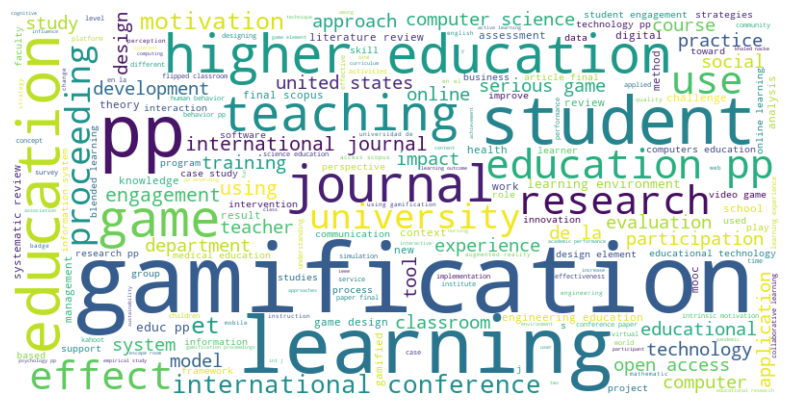

In [61]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import string

# Combine all text columns into a single series
text_series = data.apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)

# Tokenize the text
all_text = ' '.join(text_series)
tokens = word_tokenize(all_text)
tokens = [word.lower() for word in tokens if word.isalpha()]

# Count word occurrences
word_counts = Counter(tokens)

# Display the most common words
most_common_words = word_counts.most_common(10)  # Change 10 to the desired number of most common words
for word, _ in most_common_words:
    print(f"{word}")

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Basic Text pre-processing

### Remove useless columns in the context and columns with NaN values

In [62]:
columns_to_drop = ['Author(s) ID', 'Author full names', 'Volume', 'Issue', 'Art. No.', 'Funding Details', 'Conference code', 'Conference location', 'Conference name', 'Conference date', 'Funding Texts', 'Editors', 'Open Access', 'Page start', 'Page end', 'Page count', 'Cited by', 'DOI', 'Link', 'Affiliations', 'Authors with affiliations', 'Sponsors', 'Molecular Sequence Numbers', 'Chemicals/CAS', 'Tradenames', 'Manufacturers', 'ISBN', 'CODEN', 'PubMed ID', 'Authors', 'Year', 'Index Keywords', 'References', 'Correspondence Address', 'Publisher', 'ISSN', 'Language of Original Document', 'Document Type', 'Publication Stage', 'Source', 'EID']

droped_data = data.drop(columns=columns_to_drop)
droped_data

,Title,Source title,Abstract,Author Keywords,Abbreviated Source Title,Country
0,International Conference on Applied Research i...,Springer Proceedings in Business and Economics,The proceedings contain 22 papers. The special...,NaN,Springer Proc. Bus. Econ.,Denmark
1,A Game-based Approach for Open Data in Educati...,Proceedings of the European Conference on Game...,Open Data is defined as digital data that is m...,Education; Game-based learning; Open Data; Rea...,Proc. European Conf. Games-based Learn.,Turkey
2,Gamification Design in Education: What Might G...,"Technology, Knowledge and Learning",The purpose of this study was to propose desig...,Game Mechanics and Dynamics; Gamification Desi...,Tech. Knowl. Learn.,Turkey
3,A framework for adopting gamified learning sys...,Applied Nanoscience (Switzerland),The outbreak of COVID 19 has increased the anx...,Games; Gamification; Gamified learning system;...,Appl. Nanosci. (Switzerland),Australia
4,Non-game Incentives in Gamified Programming Ed...,Lecture Notes in Networks and Systems,"When gamification is used in education, non-ga...",Academic integrity; Gamification; Non-game inc...,Lect. Notes Networks Syst.,Malaysia
...,...,...,...,...,...,...
379,Peel the onion: Use of collaborative and gamif...,Lecture Notes in Business Information Processing,As software engineering and information system...,Collaboration; Education; Gamification,Lect. Notes Bus. Inf. Process.,Portugal
380,The impact of badges on course participation a...,Workshop Proceedings of the 23rd International...,Badges have long been used to encourage users ...,Badges; Gamification; Interaction; Online lear...,"Workshop Proc. Int. Conf. Comput. Educ., ICCE",NaN
381,Teaching and Designing for Augmented Reality,Proceedings of the International Conference on...,This paper discusses ways emerging interactive...,AR; Augmented Reality; Gamification; Mobile Cu...,Proc. Int. Conf. Educ. Res. Comput. Aided. Arc...,United States
382,Effects of gamified business simulations on en...,Revista de Educacion,Business simulations and Gamification have bee...,Entrepreneurial orientation; Gamification; Lea...,Revista Educ.,Germany


In [63]:
# Get the number of duplicates
duplicate = droped_data['Abstract'].duplicated().sum()
duplicate

# Remove duplicate rows
droped_data = droped_data.drop_duplicates(subset=['Abstract'])
droped_data.shape

(382, 6)

In [64]:

#do the same for title
# Get the number of duplicates
duplicate = droped_data['Title'].duplicated().sum()
duplicate

# Remove duplicate rows
droped_data = droped_data.drop_duplicates(subset=['Title'])
droped_data.shape

(376, 6)

gamification
learning
students
education
participation
study
student
game
motivation
design


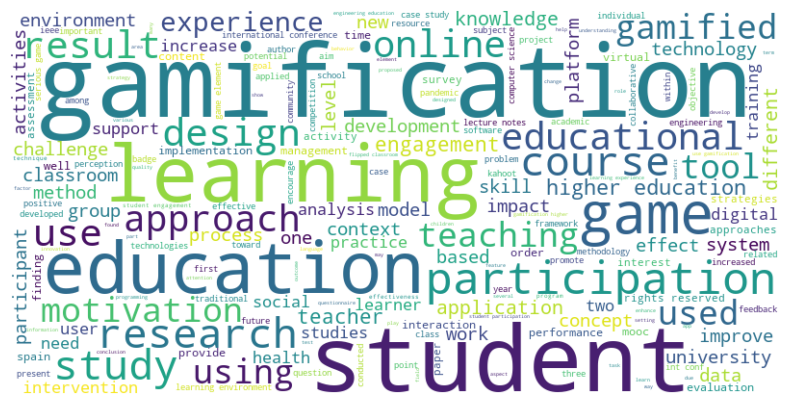

In [65]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import string

# Combine all text columns into a single series
text_series = droped_data.apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)

# Tokenize the text
all_text = ' '.join(text_series)
tokens = word_tokenize(all_text)

# Remove stopwords and punctuation
stop_words = set(stopwords.words('english'))
custom_words = set(['pp', 'de'])
stop_words.update(custom_words)
tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words and word not in string.punctuation]

# Count word occurrences
word_counts = Counter(tokens)

# Display the most common words
most_common_words = word_counts.most_common(10)  # Change 10 to the desired number of most common words
for word, _ in most_common_words:
    print(f"{word}")

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## **2. Preprocess the dataset**


### Clean up function

In [66]:
def clean_text(text_string, punctuations=r'''!()-[]{};:'"\,<>./?@#$%^&*_~'''):
    # Cleaning the urls
    string = re.sub(r'https?://\S+|www\.\S+', '', text_string)

    # Cleaning the html elements
    string = re.sub(r'<.*?>', '', string)

    # Removing the punctuations
    string = re.sub(r'[^\w\s]', '', string)

    # Converting the text to lower
    string = string.lower()

    # Removing stop words
    filtered_words = [word for word in string.split() if word not in stopwords.words('english')]

    # Custom stop words list
    customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
                  "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
                  "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
                  "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

    # Applying custom stop words
    final_words = list(set(filtered_words) - set(customlist))

    # Tokenization
    tokens = word_tokenize(' '.join(final_words))

    # Remove numbers
    tokens = [word for word in tokens if word.isalpha()]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in lemmatized_words]

    # Fix contractions
    final_string = ' '.join([contractions.fix(word) for word in stemmed_words])

    return final_string

In [67]:
droped_data

,Title,Source title,Abstract,Author Keywords,Abbreviated Source Title,Country
0,International Conference on Applied Research i...,Springer Proceedings in Business and Economics,The proceedings contain 22 papers. The special...,NaN,Springer Proc. Bus. Econ.,Denmark
1,A Game-based Approach for Open Data in Educati...,Proceedings of the European Conference on Game...,Open Data is defined as digital data that is m...,Education; Game-based learning; Open Data; Rea...,Proc. European Conf. Games-based Learn.,Turkey
2,Gamification Design in Education: What Might G...,"Technology, Knowledge and Learning",The purpose of this study was to propose desig...,Game Mechanics and Dynamics; Gamification Desi...,Tech. Knowl. Learn.,Turkey
3,A framework for adopting gamified learning sys...,Applied Nanoscience (Switzerland),The outbreak of COVID 19 has increased the anx...,Games; Gamification; Gamified learning system;...,Appl. Nanosci. (Switzerland),Australia
4,Non-game Incentives in Gamified Programming Ed...,Lecture Notes in Networks and Systems,"When gamification is used in education, non-ga...",Academic integrity; Gamification; Non-game inc...,Lect. Notes Networks Syst.,Malaysia
...,...,...,...,...,...,...
379,Peel the onion: Use of collaborative and gamif...,Lecture Notes in Business Information Processing,As software engineering and information system...,Collaboration; Education; Gamification,Lect. Notes Bus. Inf. Process.,Portugal
380,The impact of badges on course participation a...,Workshop Proceedings of the 23rd International...,Badges have long been used to encourage users ...,Badges; Gamification; Interaction; Online lear...,"Workshop Proc. Int. Conf. Comput. Educ., ICCE",NaN
381,Teaching and Designing for Augmented Reality,Proceedings of the International Conference on...,This paper discusses ways emerging interactive...,AR; Augmented Reality; Gamification; Mobile Cu...,Proc. Int. Conf. Educ. Res. Comput. Aided. Arc...,United States
382,Effects of gamified business simulations on en...,Revista de Educacion,Business simulations and Gamification have bee...,Entrepreneurial orientation; Gamification; Lea...,Revista Educ.,Germany


In [68]:
#converts all the values in a specific columns of the DataFrame data to strings 
droped_data["Abstract"] = droped_data["Abstract"].astype(str) 

#Applying a Text Cleaning Function
droped_data['clean_Abstract'] = droped_data['Abstract'].apply(clean_text)

In [69]:
droped_data['clean_Abstract']

0      case firm incom disclosur woman polic energi o...
1      freeli design found defin possibl connect outl...
2      student addit found high cours activ recommend...
3      manageri purpos satisfact deploy abdulaziz sug...
4      student offer involv cours explor term ie excl...
                             ...                        
379    student high projectbas cours integr case soft...
380    student user read recent cours graduat studi c...
381    case way content architectur user commerc prev...
382    relationship near scienc entrepreneuri granada...
383    content act requir sens materi use construct t...
Name: clean_Abstract, Length: 376, dtype: object

In [70]:
#... aims to create a new DataFrame called selected_columns that contains only the "Title" and "cleanTitle" columns from the original DataFrame df. Then, it displays the first 20 rows of this new DataFrame using the .head(20) method.
selected_columns = droped_data[['Abstract', 'clean_Abstract']]
selected_columns.head(20)

,Abstract,clean_Abstract
0,The proceedings contain 22 papers. The special...,case firm incom disclosur woman polic energi o...
1,Open Data is defined as digital data that is m...,freeli design found defin possibl connect outl...
2,The purpose of this study was to propose desig...,student addit found high cours activ recommend...
3,The outbreak of COVID 19 has increased the anx...,manageri purpos satisfact deploy abdulaziz sug...
4,"When gamification is used in education, non-ga...",student offer involv cours explor term ie excl...
5,Underachievers - students have poor academic p...,found neg grasha mean malaysia gradual effect ...
6,Climate change caused by excessive carbon emis...,still goalfram cooper consum gain ltd sever ac...
7,Despite the exponential success of using creat...,activ board satisfact despit use find weak imp...
8,"In the era of digital education, it makes sens...",student often ownerauthor cours educ game gami...
9,One of the main problems of Massive Open Onlin...,student high cours problem term decad literatu...


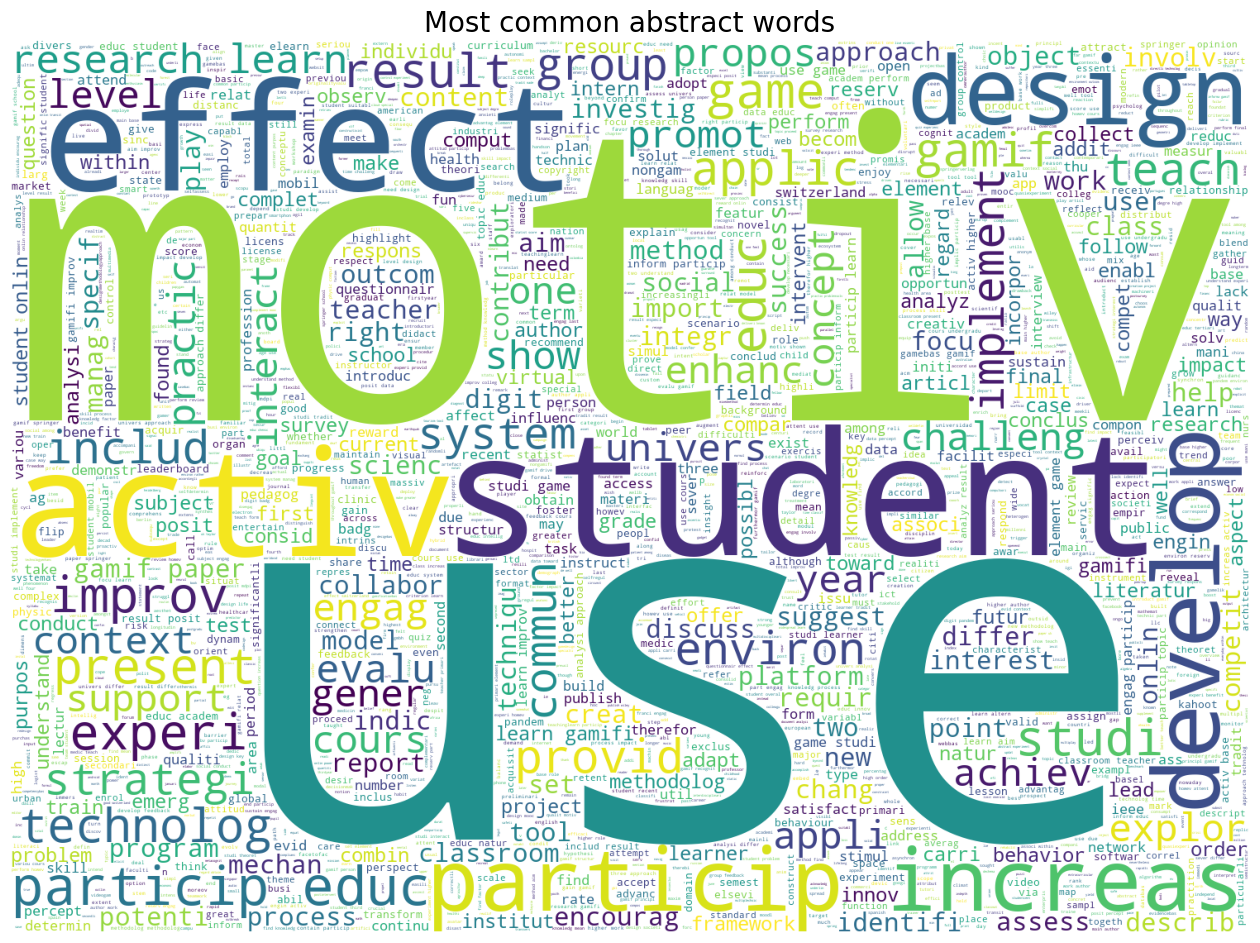

In [71]:
plt.subplots(figsize=(16,13))
wordcloud = WordCloud(
                          background_color='white',max_words = 10000, width=1500, stopwords=STOPWORDS,
                          height=1080).generate(" ".join(droped_data["clean_Abstract"]))
plt.title("Most common abstract words", fontsize=20)
plt.imshow(wordcloud.recolor( colormap= 'viridis'))
plt.axis('off')
plt.show()

## Advanced text processing

### Bag-Of-Words ou 1 gram

In [72]:
# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the 'cleanTitle' column
X = vectorizer.fit_transform(droped_data['clean_Abstract'])

# Convert the BoW array into a DataFrame
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Show the resulting DataFrame
print(bow_df)


     aabb  aalborg  ab  abab  abandon  abandonedvac  abdulaziz  abierto  abil  \
0       0        0   0     0        0             0          0        0     0   
1       0        0   0     0        0             0          0        0     0   
2       0        0   0     0        0             0          0        0     0   
3       0        0   0     0        0             0          1        0     0   
4       0        0   0     0        0             0          0        0     0   
..    ...      ...  ..   ...      ...           ...        ...      ...   ...   
371     0        0   0     0        0             0          0        0     0   
372     0        0   0     0        0             0          0        0     0   
373     0        0   0     0        0             0          0        0     0   
374     0        0   0     0        0             0          0        0     0   
375     0        0   0     0        0             0          0        0     0   

     abl  ...  zaragoza  zh

### Term Frequency-Inverse Document Frequency (TF-IDF)

In [73]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the cleaned abstracts
tfidf_matrix = tfidf_vectorizer.fit_transform(droped_data['clean_Abstract'])

# Convert to array and then to DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(tfidf_df)


     aabb  aalborg   ab  abab  abandon  abandonedvac  abdulaziz  abierto  \
0     0.0      0.0  0.0   0.0      0.0           0.0   0.000000      0.0   
1     0.0      0.0  0.0   0.0      0.0           0.0   0.000000      0.0   
2     0.0      0.0  0.0   0.0      0.0           0.0   0.000000      0.0   
3     0.0      0.0  0.0   0.0      0.0           0.0   0.157126      0.0   
4     0.0      0.0  0.0   0.0      0.0           0.0   0.000000      0.0   
..    ...      ...  ...   ...      ...           ...        ...      ...   
371   0.0      0.0  0.0   0.0      0.0           0.0   0.000000      0.0   
372   0.0      0.0  0.0   0.0      0.0           0.0   0.000000      0.0   
373   0.0      0.0  0.0   0.0      0.0           0.0   0.000000      0.0   
374   0.0      0.0  0.0   0.0      0.0           0.0   0.000000      0.0   
375   0.0      0.0  0.0   0.0      0.0           0.0   0.000000      0.0   

     abil  abl  ...  zaragoza  zhang  zhejiang  zimbabw  zoom  zou  zulia  \
0     0.0 

*Bar Plot for Most Common TF-IDF*

You can use a bar plot to visualize the most common TF-IDF in the corpus.

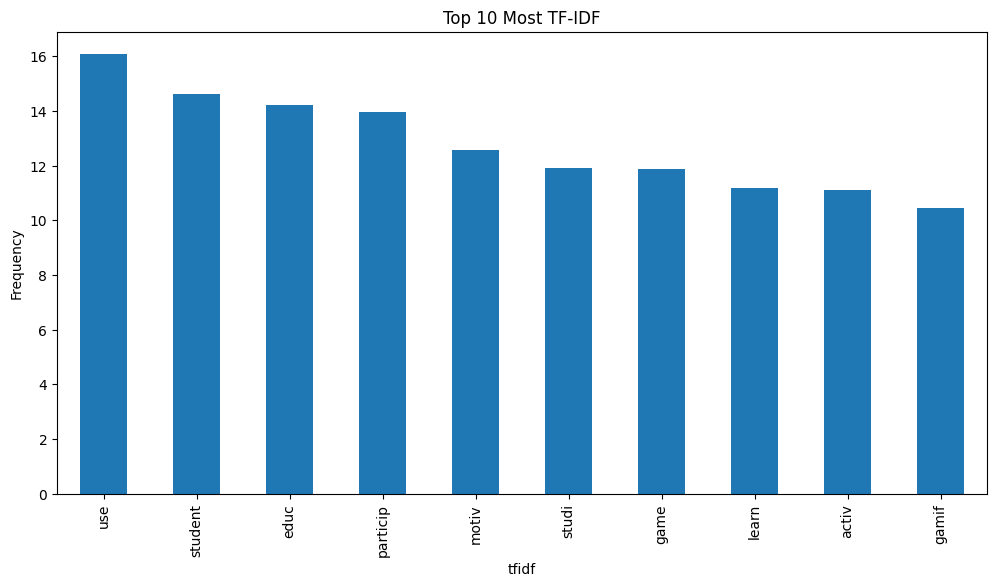

In [74]:
# Sum up the counts of each bigram
sum_tfidf = tfidf_df.sum(axis=0)

# Sort and select top 10 bigrams
sorted_tfidf = sum_tfidf.sort_values(ascending=False)[:10]

# Plot
plt.figure(figsize=(12, 6))
sorted_tfidf.plot(kind='bar')
plt.title('Top 10 Most TF-IDF')
plt.xlabel('tfidf')
plt.ylabel('Frequency')
plt.show()


## Part of Speech (POS) Tagging

In [75]:
# Function to tag POS in a sentence
def pos_tag_sentence(sentence):
    tokens = word_tokenize(sentence)
    return pos_tag(tokens)

# Apply POS tagging to each cleaned abstract
droped_data['POS_Tagged_Abstract'] = droped_data['clean_Abstract'].apply(pos_tag_sentence)

# Display the DataFrame
print(droped_data[['clean_Abstract', 'POS_Tagged_Abstract']].head())


                                      clean_Abstract  \
0  case firm incom disclosur woman polic energi o...   
1  freeli design found defin possibl connect outl...   
2  student addit found high cours activ recommend...   
3  manageri purpos satisfact deploy abdulaziz sug...   
4  student offer involv cours explor term ie excl...   

                                 POS_Tagged_Abstract  
0  [(case, NN), (firm, NN), (incom, NN), (disclos...  
1  [(freeli, JJ), (design, NN), (found, VBD), (de...  
2  [(student, NN), (addit, NN), (found, VBD), (hi...  
3  [(manageri, NN), (purpos, NN), (satisfact, JJ)...  
4  [(student, NN), (offer, NN), (involv, NN), (co...  


**Frequency Distribution of POS Tags**

Bar chart to show the frequency distribution of different POS tags across all abstracts.

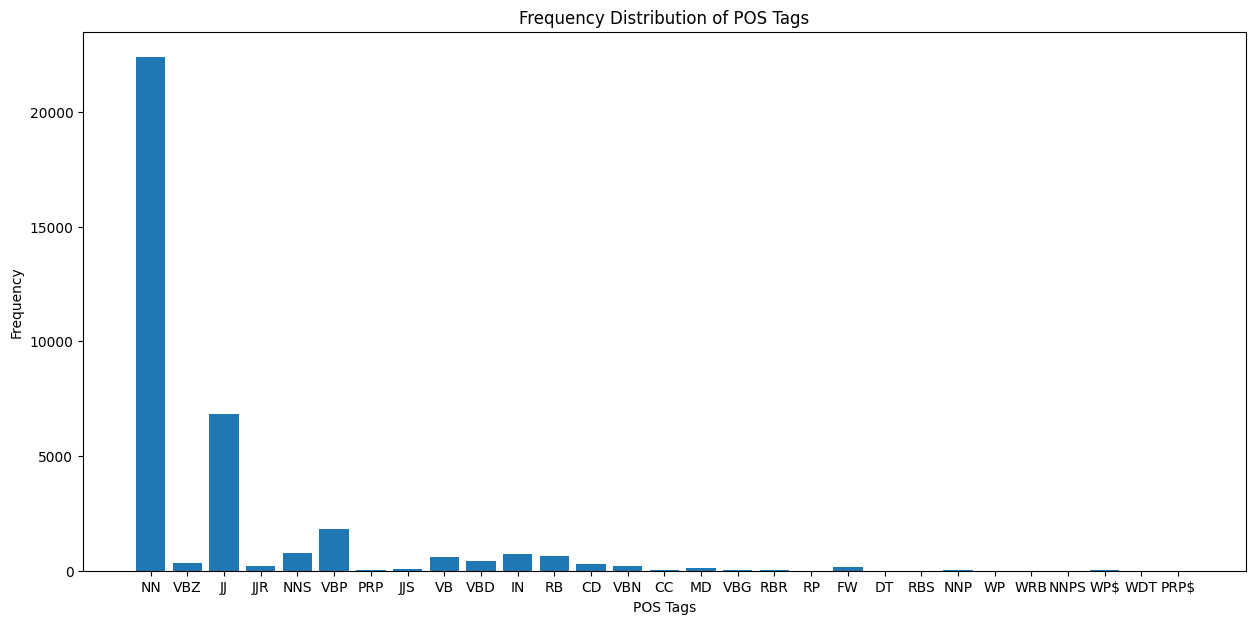

In [76]:
import matplotlib.pyplot as plt
from collections import Counter
import itertools

# Flatten the list of all POS tags from all abstracts
all_tags = list(itertools.chain.from_iterable(droped_data['POS_Tagged_Abstract'].apply(lambda x: [tag for word, tag in x])))

# Count the frequency of each POS tag
tag_freq = Counter(all_tags)

# Create a bar chart
plt.figure(figsize=(15, 7))
plt.bar(tag_freq.keys(), tag_freq.values())
plt.xlabel('POS Tags')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of POS Tags')
plt.show()


**Pie Chart for Overall Tag Distribution**

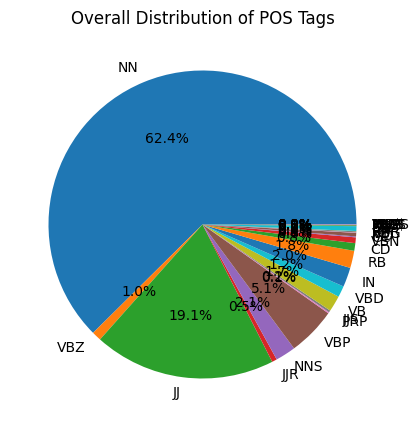

In [77]:
# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(tag_freq.values(), labels=tag_freq.keys(), autopct='%1.1f%%')
plt.title('Overall Distribution of POS Tags')
plt.show()


In [96]:
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Assuming droped_data is your DataFrame and 'clean_Abstract' is the column with abstracts
unique_countries = droped_data['Country'].unique()

# Function to preprocess data for a specific country
def preprocess_data_for_country(df, country):
    documents = df[df['Country'] == country]['clean_Abstract']
    texts = [[word for word in simple_preprocess(str(doc))] for doc in documents]
    return texts

# Iterate through each unique country and perform topic modeling
country = 'Portugal'

def lda_unique_country(country):

    # Preprocess data for the current country
    processed_texts = preprocess_data_for_country(droped_data, country)

    print(f"Number of documents for {country}: {len(processed_texts)}")

    if not processed_texts:
        print(f"No documents for {country}. Skipping.")
        
    else:

        # Create Dictionary
        id2word = corpora.Dictionary(processed_texts)

        # Term Document Frequency
        corpus = [id2word.doc2bow(text) for text in processed_texts]

        # Set number of topics
        num_topics = 10
        lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, alpha='auto', per_word_topics=True)

        # Print the keywords for each topic
        print(f"Topics for {country}:")
        print(lda_model.print_topics())

        # Coherence Score
        coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_texts, dictionary=id2word, coherence='c_v')
        coherence_lda = coherence_model_lda.get_coherence()
        print(f'Coherence Score for {country}:', coherence_lda)

        pyLDAvis.enable_notebook()
        vis = gensimvis.prepare(lda_model, corpus, id2word)

        return vis
    


In [97]:
# Visualization using pyLDAvis
vis = lda_unique_country("Portugal")
pyLDAvis.display(vis)

Number of documents for Portugal: 21
Topics for Portugal:
[(0, '0.010*"use" + 0.009*"student" + 0.007*"particip" + 0.007*"educ" + 0.007*"learn" + 0.007*"motiv" + 0.007*"gamif" + 0.007*"increas" + 0.006*"game" + 0.005*"activ"'), (1, '0.008*"game" + 0.008*"student" + 0.008*"particip" + 0.008*"experi" + 0.007*"activ" + 0.007*"use" + 0.007*"gamif" + 0.007*"learn" + 0.007*"educ" + 0.007*"context"'), (2, '0.013*"student" + 0.011*"use" + 0.010*"particip" + 0.008*"educ" + 0.007*"game" + 0.007*"increas" + 0.007*"studi" + 0.007*"year" + 0.007*"interact" + 0.006*"base"'), (3, '0.012*"particip" + 0.011*"use" + 0.008*"design" + 0.007*"activ" + 0.007*"learn" + 0.006*"provid" + 0.006*"develop" + 0.006*"research" + 0.006*"challeng" + 0.006*"present"'), (4, '0.020*"use" + 0.013*"particip" + 0.010*"paper" + 0.009*"activ" + 0.009*"learn" + 0.009*"student" + 0.008*"base" + 0.008*"gamif" + 0.007*"system" + 0.007*"motiv"'), (5, '0.014*"use" + 0.009*"educ" + 0.008*"increas" + 0.008*"particip" + 0.008*"studen